In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taxi_df = pd.read_csv('./nyc_taxi.csv')

In [3]:
taxi_df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [4]:
taxi_df.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


#### The value column in this dataset aggregates the number of passengers in bins of 30 mins. There are 5 anomalies (NYC marathon, Thanksgiving, Christmas, New Years Day and a snowstorm).

### Anomalies dates:
#### NYC marathon (11/02/14)
#### Thanksgiving (11/27/14)
#### Christmas (12/25/14)
#### New Years Day (01/01/15)
#### Snowstorm (01/26/15 - 01/27/15)

In [6]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
timestamp    10320 non-null object
value        10320 non-null int64
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


#### There isn't much work to do as far as cleaning up the data or trying to get new features here. The first thing I will do is convert the first column (timestamp) to a datetime format

In [7]:
taxi_df.timestamp = pd.to_datetime(taxi_df.timestamp)

In [9]:
taxi_df.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

In [10]:
taxi_df.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


#### I will build a scatterplot that will allow me to visualize the data and make any hypothesis.

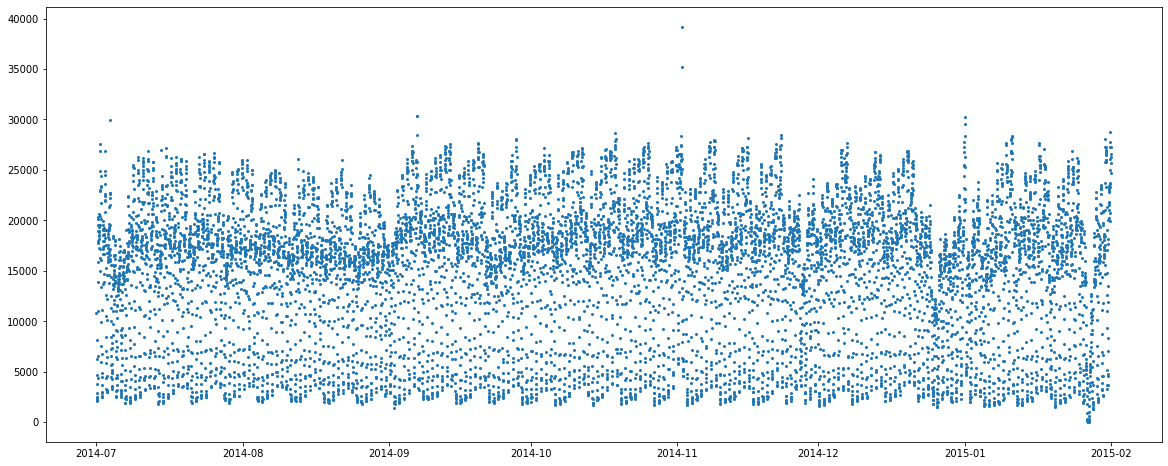

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot_date(taxi_df.timestamp, taxi_df.value, markersize=2)

#### We can already see some points that seem to be outliers. For example around 2014-07 there is a value close to 3000, close to 2014-11 there are a couple of points around 4000, close to 2015-01 there are a series of values close to 3000.
#### However, this graph provides us with too much data, it would be interesting to see the trend if we group up the values by the date and add them up.

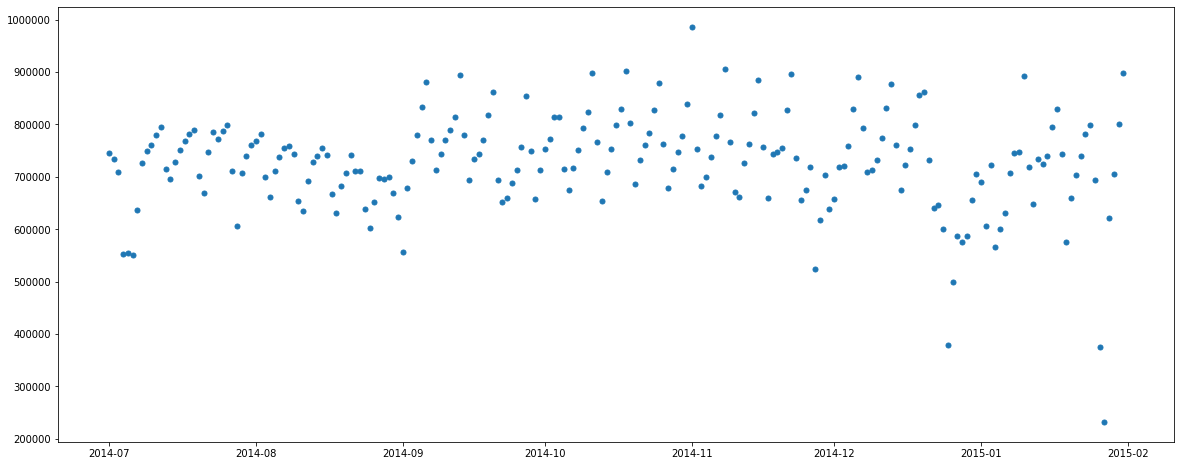

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
resampled_df = taxi_df.resample('D',on='timestamp').sum().reset_index()
ax.plot_date(resampled_df.timestamp, resampled_df.value, markersize=5)

#### The previous graph shows the sum of the values grouped by date. We can already see some interesting dates such as right after 2014-11 which has the highest sum in the whole dataset and also close to 2015-02 which has the lowest sum. Let's see what results we get if we use the median instead of the sum.

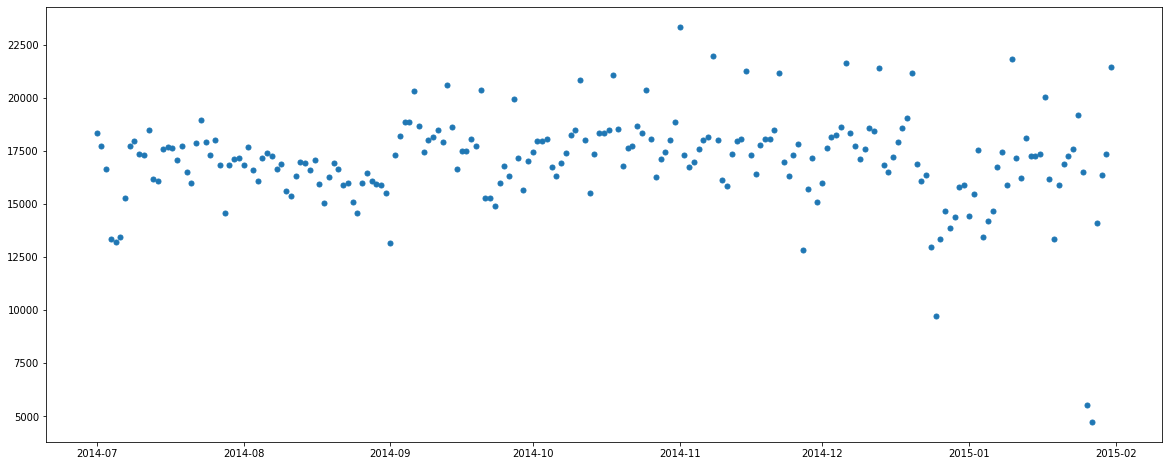

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
resampled_df = taxi_df.resample('D',on='timestamp').median().reset_index()
ax.plot_date(resampled_df.timestamp, resampled_df.value, markersize=5)

#### We have pretty similar results to the previous graph. There are 6 dates that are of particular interest: 2014-07, 2014-09, 2014-11, 2014-12, 2015-01, 2015-02.

#### Something that would definitely affect the value times is if the date falls on a weekend. Therefore, we will add this feature as a boolean value to dataframe that has the resampled data.

In [37]:
resampled_df.head()

,timestamp,value
0,2014-07-01,18320.5
1,2014-07-02,17711.0
2,2014-07-03,16620.5
3,2014-07-04,13350.0
4,2014-07-05,13221.0


In [39]:
resampled_df.timestamp.dt.dayofweek

0      1
1      2
2      3
3      4
4      5
5      6
6      0
7      1
8      2
9      3
10     4
11     5
12     6
13     0
14     1
15     2
16     3
17     4
18     5
19     6
20     0
21     1
22     2
23     3
24     4
25     5
26     6
27     0
28     1
29     2
      ..
185    4
186    5
187    6
188    0
189    1
190    2
191    3
192    4
193    5
194    6
195    0
196    1
197    2
198    3
199    4
200    5
201    6
202    0
203    1
204    2
205    3
206    4
207    5
208    6
209    0
210    1
211    2
212    3
213    4
214    5
Name: timestamp, Length: 215, dtype: int64

In [40]:
resampled_df['weekday'] = resampled_df.timestamp.dt.dayofweek

#### Then we will make a new column called weekend which will contain a 0 if the date is not in the weekend and a 1 if it falls on the weekend. 

In [47]:
resampled_df['weekend'] = np.where((resampled_df.weekday==4)|(resampled_df.weekday==5)|(resampled_df.weekday==6), 1,0)

In [48]:
resampled_df.head(15)

,timestamp,value,weekday,weekend
0,2014-07-01,18320.5,1,0
1,2014-07-02,17711.0,2,0
2,2014-07-03,16620.5,3,0
3,2014-07-04,13350.0,4,1
4,2014-07-05,13221.0,5,1
5,2014-07-06,13423.0,6,1
6,2014-07-07,15263.0,0,0
7,2014-07-08,17703.5,1,0
8,2014-07-09,17976.0,2,0
9,2014-07-10,17335.5,3,0


#### Great, so now we will visualize the same plot as before. However, we will paint the weekend values in a separate color.

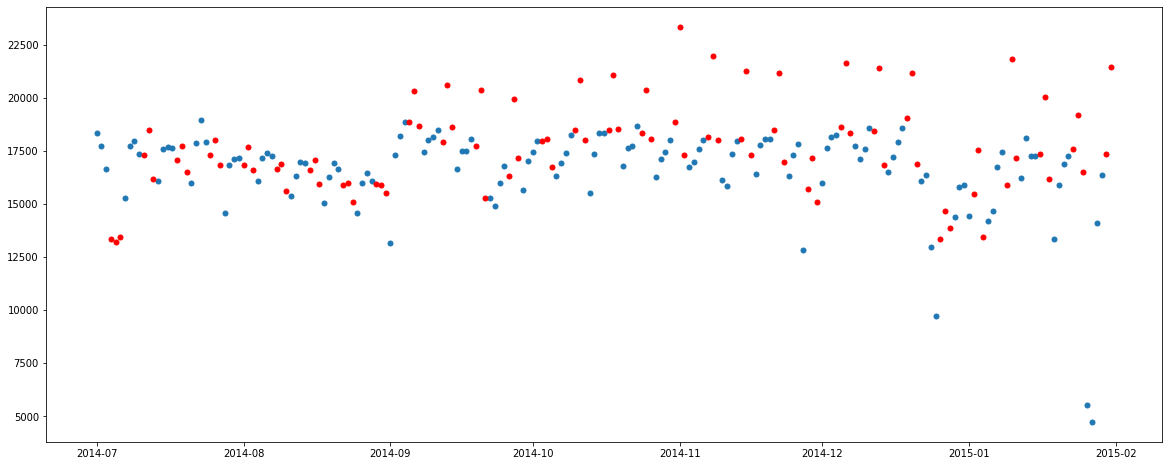

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot_date(resampled_df[resampled_df.weekend == 0].timestamp, resampled_df[resampled_df.weekend == 0].value, markersize=5)
ax.plot_date(resampled_df[resampled_df.weekend == 1].timestamp, resampled_df[resampled_df.weekend == 1].value, markersize=5, c='red')

#### As we can see from the previous graph, the highest values usually occur during the weekend, specifically on saturdays. However, there already is an event that seems extremely uncommon: the first weekend on 2014-07 has pretty low values for a weekend. Also, the first saturday of 2014-11 has a pretty high value, the highest of all the data sample. I will keep using the resampled dataframe as it is more convenient. 

#### We will first use the Interquartile Range method to attempt to find the anomalies in these data.

In [51]:
q1 = resampled_df.value.quantile(0.25)
q3 = resampled_df.value.quantile(0.75)
iqr = q3 - q1
print(iqr)

1896.25


In [54]:
resampled_df['iqr'] = (resampled_df.value < (q1 - 1.5 * iqr)) | (resampled_df.value > (q3 + 1.5 * iqr))

In [56]:
resampled_df.head(10)

,timestamp,value,weekday,weekend,iqr
0,2014-07-01,18320.5,1,0,False
1,2014-07-02,17711.0,2,0,False
2,2014-07-03,16620.5,3,0,False
3,2014-07-04,13350.0,4,1,False
4,2014-07-05,13221.0,5,1,True
5,2014-07-06,13423.0,6,1,False
6,2014-07-07,15263.0,0,0,False
7,2014-07-08,17703.5,1,0,False
8,2014-07-09,17976.0,2,0,False
9,2014-07-10,17335.5,3,0,False


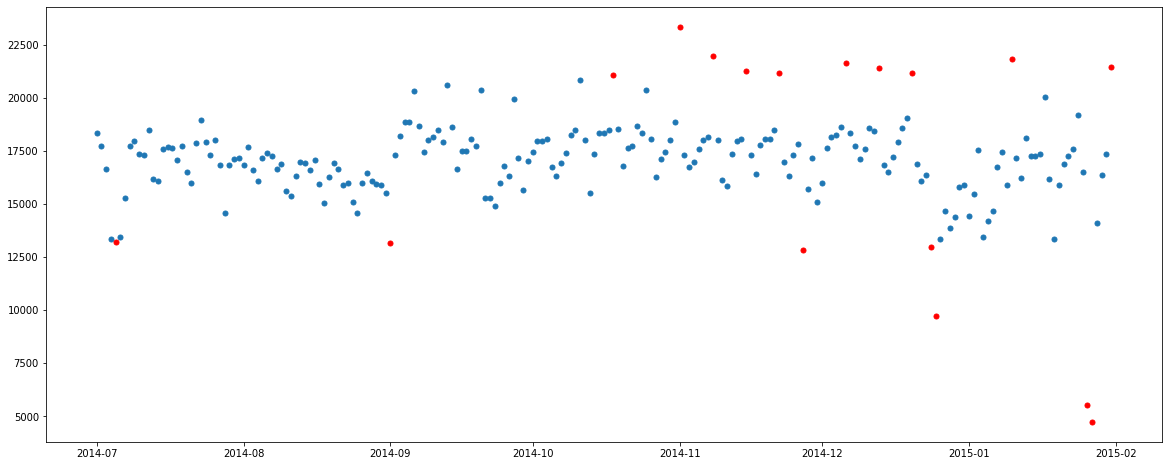

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot_date(resampled_df[resampled_df.iqr==False].timestamp, resampled_df[resampled_df.iqr==False].value, markersize=5)
ax.plot_date(resampled_df[resampled_df.iqr==True].timestamp,resampled_df[resampled_df.iqr==True].value, markersize=5, c='red')

#### Interquartile range has managed to isolate 17 individual dates which doesn't correspond to the suggestion that there are 5 dates within this time frame that are anomalies. IQR considered several saturdays as anomalies, which is not correct since these follow a trend that show that the weekends are busy dates.

#### Let's visualize the dates are the real anomalies in this dataset.

In [84]:
anomalies_dates = ['11/02/14','11/27/14','12/25/14','01/01/15','01/26/15','01/27/15 ']

In [63]:
print(r)

     timestamp    value  weekday  weekend    iqr
124 2014-11-02  17311.0        6        1  False
149 2014-11-27  12815.5        3        0   True
177 2014-12-25   9713.0        3        0   True
184 2015-01-01  14420.5        3        0  False
207 2015-01-24  19195.5        5        1  False
208 2015-01-25  16503.5        6        1  False


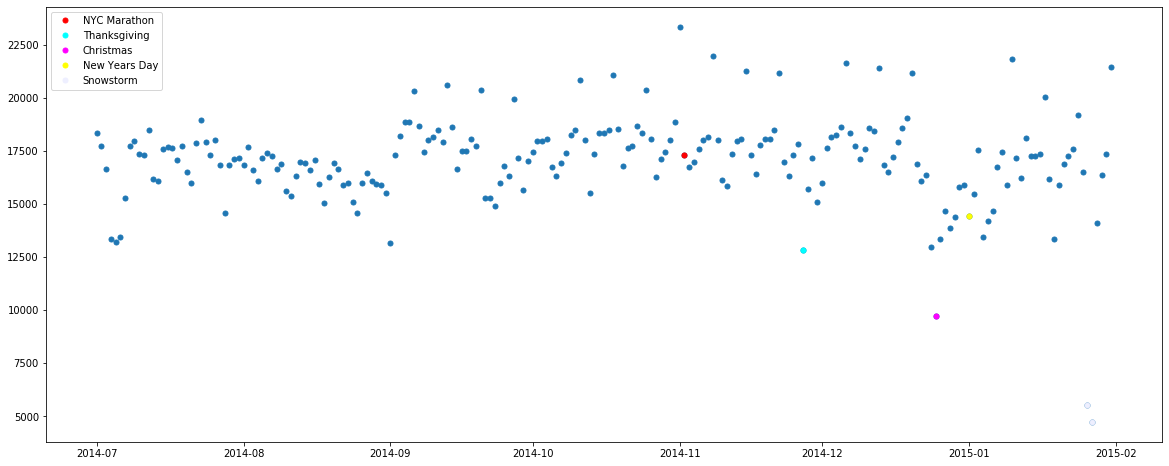

In [87]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.plot_date(resampled_df.timestamp,resampled_df.value, markersize=5)
ax.plot_date(resampled_df[resampled_df.timestamp=='11/02/14'].timestamp, resampled_df[resampled_df.timestamp=='11/02/14'].value, c='red', markersize=5, label='NYC Marathon')
ax.plot_date(resampled_df[resampled_df.timestamp=='11/27/14'].timestamp, resampled_df[resampled_df.timestamp=='11/27/14'].value, c='cyan', markersize=5, label='Thanksgiving')
ax.plot_date(resampled_df[resampled_df.timestamp=='12/25/14'].timestamp, resampled_df[resampled_df.timestamp=='12/25/14'].value, c='magenta', markersize=5, label='Christmas')
ax.plot_date(resampled_df[resampled_df.timestamp=='01/01/15'].timestamp, resampled_df[resampled_df.timestamp=='01/01/15'].value, c='yellow', markersize=5, label='New Years Day')
snowstorm_date = ['01/26/15', '01/27/15']
ax.plot_date(resampled_df[resampled_df.timestamp.isin(snowstorm_date)].timestamp, resampled_df[resampled_df.timestamp.isin(snowstorm_date)].value, c='#eeefff', markersize=5, label='Snowstorm')
ax.legend()

#### Interestingly none of these anomalies represent values that are really large, they usually show values that are short in comparison to what they should be. Let's see what day each one falls in.

In [86]:
resampled_df[resampled_df.timestamp.isin(anomalies_dates)]

,timestamp,value,weekday,weekend,iqr
124,2014-11-02,17311.0,6,1,False
149,2014-11-27,12815.5,3,0,True
177,2014-12-25,9713.0,3,0,True
184,2015-01-01,14420.5,3,0,False
209,2015-01-26,5553.0,0,0,True
210,2015-01-27,4729.0,1,0,True


#### The NYC marathon fell on a Sunday, Thanksgiving on a Wednesday, Christmas on a Wednesday, New Years on a Wednesday and the two days of the snowstorm on a Monday and Tuesday. Let's try to group the values by weekday and get the average of each one and compare them to each of the anomalies.

In [90]:
resampled_df.groupby('weekday').mean().reset_index()

,weekday,value,weekend,iqr
0,0,15382.816667,0,0.066667
1,1,16554.161290,0,0.032258
2,2,17208.806452,0,0.032258
3,3,17148.338710,0,0.064516
4,4,17202.951613,1,0.000000
5,5,19229.645161,1,0.354839
6,6,16554.716667,1,0.000000


#### In most of the cases, the values of the anomalities are well below the average for each weekday. However, in the case of the NYC marathon, its value is above the average but the difference is not that large when compared to what the other anomalies showed. Let's visalize the data for all mondays and see if we can get any other information about this date.

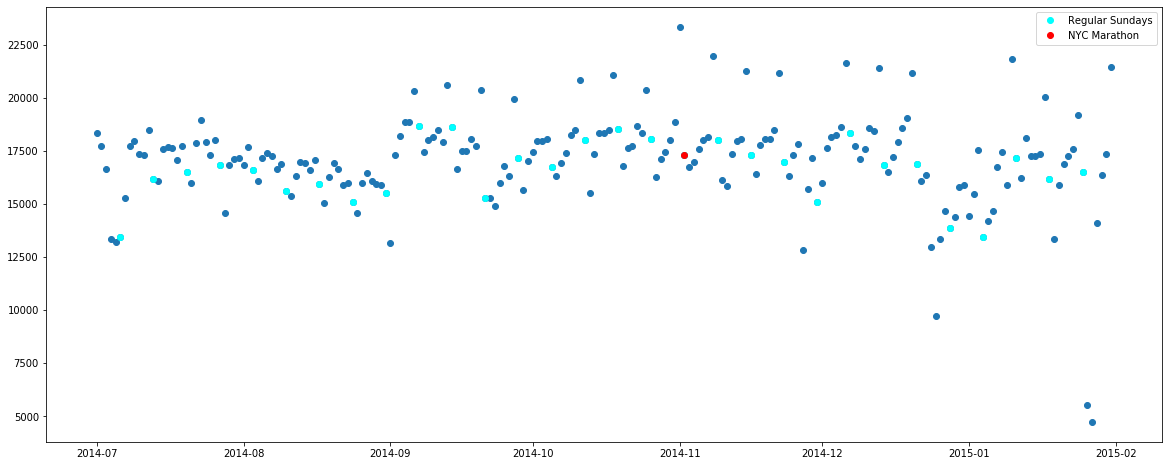

In [97]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax.plot_date(resampled_df.timestamp, resampled_df.value)
ax.plot_date(resampled_df[resampled_df.weekday==6].timestamp, resampled_df[resampled_df.weekday==6].value,color='cyan',label='Regular Sundays')
ax.plot_date(resampled_df[resampled_df.timestamp=='2014-11-02'].timestamp, resampled_df[resampled_df.timestamp=='2014-11-02'].value,color='red',label='NYC Marathon')
ax.legend()

#### Interestingly that value doesn't look like an anomaly, it looks as part of the regular trend of values for that weekday. It actually seems like the value from the day before is the one would be considered an anomaly.

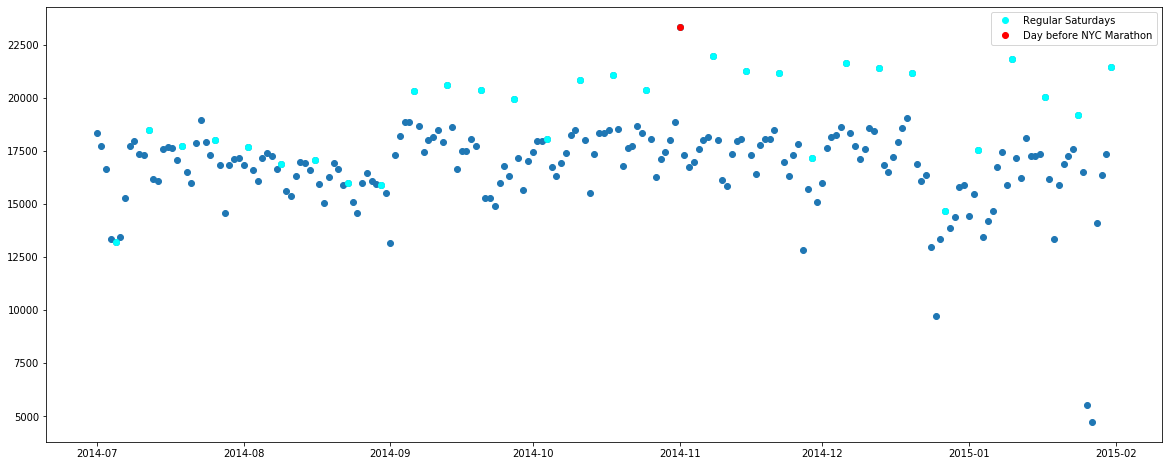

In [100]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax.plot_date(resampled_df.timestamp, resampled_df.value)
ax.plot_date(resampled_df[resampled_df.weekday==5].timestamp, resampled_df[resampled_df.weekday==5].value,color='cyan',label='Regular Saturdays')
ax.plot_date(resampled_df[resampled_df.timestamp=='2014-11-01'].timestamp, resampled_df[resampled_df.timestamp=='2014-11-01'].value,color='red',label='Day before NYC Marathon')
ax.legend()

#### Now this looks a bit more like an anomaly as it doesn't follow the distribution. However, this does not agree with the data that we received before which indicated that the new york marathon was an anomaly. Also, another possibility is that since this data shows the median of the original data grouped by date then this does not reflect accurately in the graph. Let's verify the original graph.

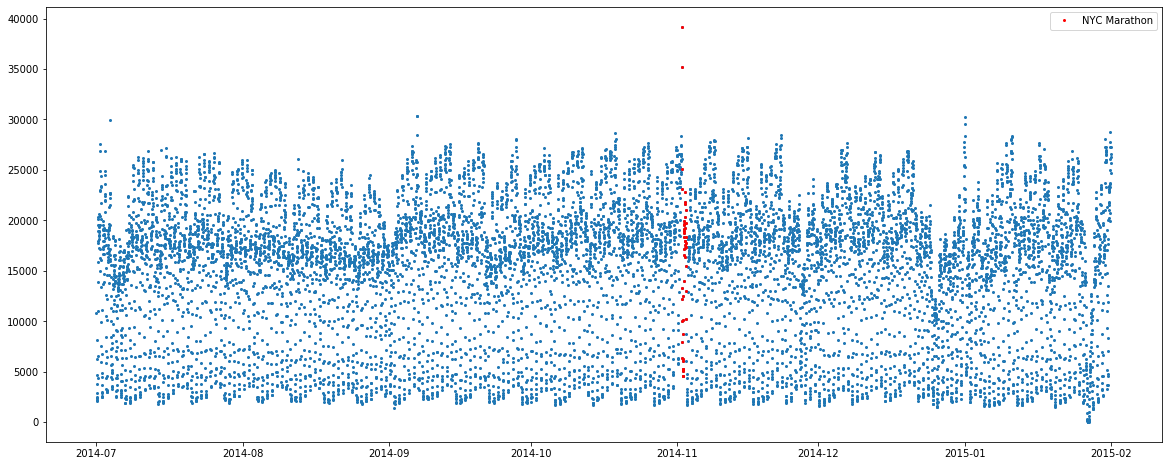

In [143]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.plot_date(taxi_df.timestamp,taxi_df.value,markersize=2)
nyc_mar = taxi_df[(taxi_df.timestamp >= '2014-11-02 00:00') & (taxi_df.timestamp < '2014-11-03 00:00')]
ax.plot_date(nyc_mar.timestamp, nyc_mar.value, markersize=2, color='red', label='NYC Marathon')
ax.legend()

#### The most interesting thing out of this graph is that during the date for the nyc marathon we have the two highest values in the data set. It should be fair to consider them anomalies.

#### Now I will use a one class support vector machine to see if I can improve the accuracy of the anomaly detection.

In [144]:
resampled_df.head()

,timestamp,value,weekday,weekend,iqr
0,2014-07-01,18320.5,1,0,False
1,2014-07-02,17711.0,2,0,False
2,2014-07-03,16620.5,3,0,False
3,2014-07-04,13350.0,4,1,False
4,2014-07-05,13221.0,5,1,True


#### First I will add a column that indicates if the date is an anomaly or not, that way the svm can learn.

In [145]:
resampled_df['anomaly'] = False

In [146]:
resampled_df.head()

,timestamp,value,weekday,weekend,iqr,anomaly
0,2014-07-01,18320.5,1,0,False,False
1,2014-07-02,17711.0,2,0,False,False
2,2014-07-03,16620.5,3,0,False,False
3,2014-07-04,13350.0,4,1,False,False
4,2014-07-05,13221.0,5,1,True,False


In [159]:
resampled_df.loc[resampled_df.timestamp.isin(anomalies_dates)]

,timestamp,value,weekday,weekend,iqr,anomaly
124,2014-11-02,17311.0,6,1,False,False
149,2014-11-27,12815.5,3,0,True,False
177,2014-12-25,9713.0,3,0,True,False
184,2015-01-01,14420.5,3,0,False,False
209,2015-01-26,5553.0,0,0,True,False
210,2015-01-27,4729.0,1,0,True,False


In [167]:
resampled_df.iloc[124,5] = True
resampled_df.iloc[149,5] = True
resampled_df.iloc[177,5] = True
resampled_df.iloc[184,5] = True
resampled_df.iloc[209,5] = True
resampled_df.iloc[210,5] = True

In [168]:
resampled_df[resampled_df.anomaly == True]

,timestamp,value,weekday,weekend,iqr,anomaly
124,2014-11-02,17311.0,6,1,False,True
149,2014-11-27,12815.5,3,0,True,True
177,2014-12-25,9713.0,3,0,True,True
184,2015-01-01,14420.5,3,0,False,True
209,2015-01-26,5553.0,0,0,True,True
210,2015-01-27,4729.0,1,0,True,True


In [172]:
resampled_df['year'] = resampled_df.timestamp.dt.year
resampled_df['month'] = resampled_df.timestamp.dt.month
resampled_df['day'] = resampled_df.timestamp.dt.day

In [173]:
resampled_df.head()

,timestamp,value,weekday,weekend,iqr,anomaly,year,month,day
0,2014-07-01,18320.5,1,0,False,False,2014,7,1
1,2014-07-02,17711.0,2,0,False,False,2014,7,2
2,2014-07-03,16620.5,3,0,False,False,2014,7,3
3,2014-07-04,13350.0,4,1,False,False,2014,7,4
4,2014-07-05,13221.0,5,1,True,False,2014,7,5


In [177]:
resampled_df.dtypes

timestamp    datetime64[ns]
value               float64
weekday               int64
weekend               int64
iqr                    bool
anomaly                bool
year                  int64
month                 int64
day                   int64
dtype: object

In [169]:
from sklearn import svm

clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)

In [180]:
clf.fit(resampled_df.drop(columns=['timestamp','iqr', 'anomaly']))
out_pred = clf.predict(resampled_df.drop(columns=['timestamp','iqr', 'anomaly']))

In [182]:
out_pred

array([-1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1])

In [183]:
resampled_df['svm'] = out_pred

In [184]:
resampled_df.head()

,timestamp,value,weekday,weekend,iqr,anomaly,year,month,day,svm
0,2014-07-01,18320.5,1,0,False,False,2014,7,1,-1
1,2014-07-02,17711.0,2,0,False,False,2014,7,2,-1
2,2014-07-03,16620.5,3,0,False,False,2014,7,3,1
3,2014-07-04,13350.0,4,1,False,False,2014,7,4,1
4,2014-07-05,13221.0,5,1,True,False,2014,7,5,1


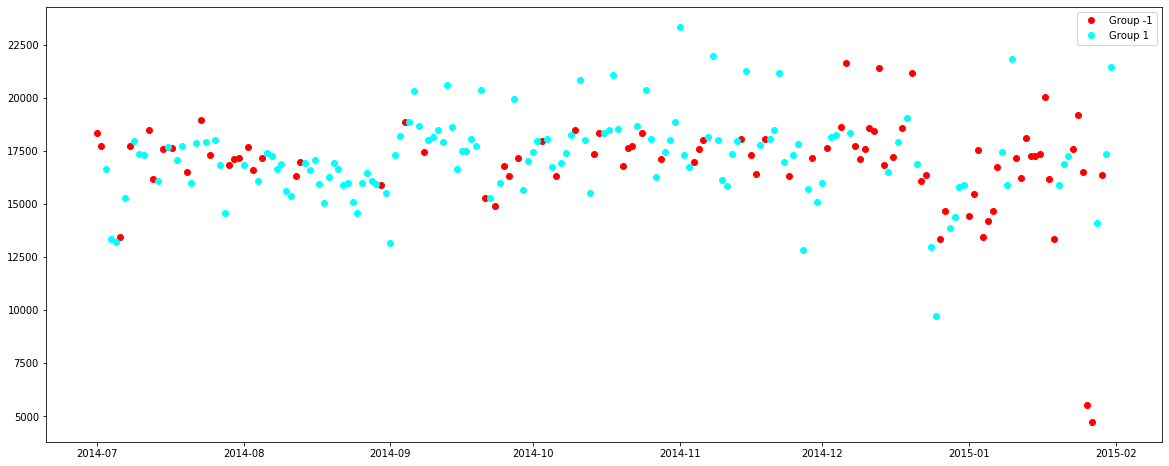

In [186]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax.plot_date(resampled_df[resampled_df.svm == -1].timestamp, resampled_df[resampled_df.svm==-1].value,color='red',label='Group -1')
ax.plot_date(resampled_df[resampled_df.svm == 1].timestamp, resampled_df[resampled_df.svm==1].value,color='cyan',label='Group 1')
ax.legend()

#### This first estimation is pretty rough, we need to fine tune the parameters used in the SVM.

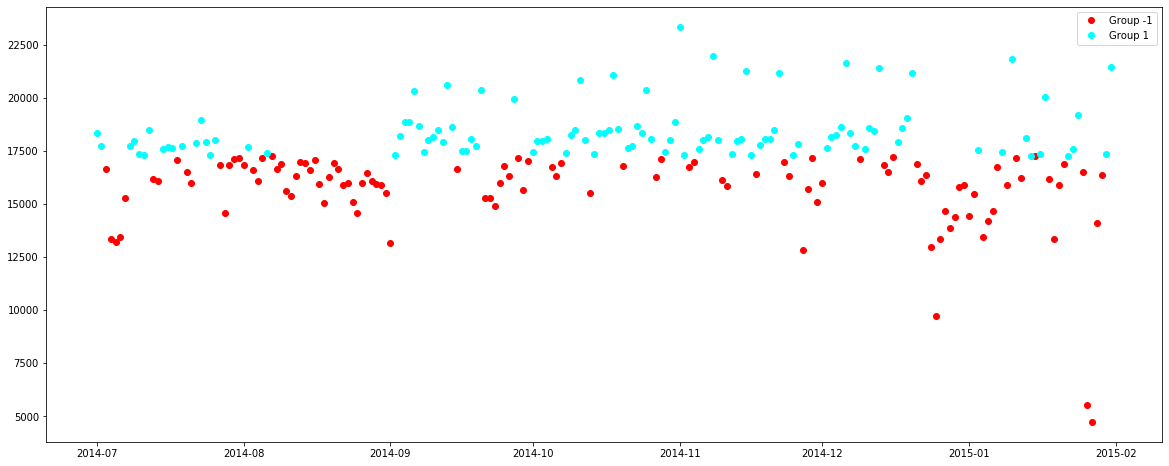

In [187]:
clf = svm.OneClassSVM(kernel='linear')
clf.fit(resampled_df.drop(columns=['timestamp','iqr', 'anomaly','svm']))
out_pred = clf.predict(resampled_df.drop(columns=['timestamp','iqr', 'anomaly','svm']))
resampled_df['svm'] = out_pred
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax.plot_date(resampled_df[resampled_df.svm == -1].timestamp, resampled_df[resampled_df.svm==-1].value,color='red',label='Group -1')
ax.plot_date(resampled_df[resampled_df.svm == 1].timestamp, resampled_df[resampled_df.svm==1].value,color='cyan',label='Group 1')
ax.legend()

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


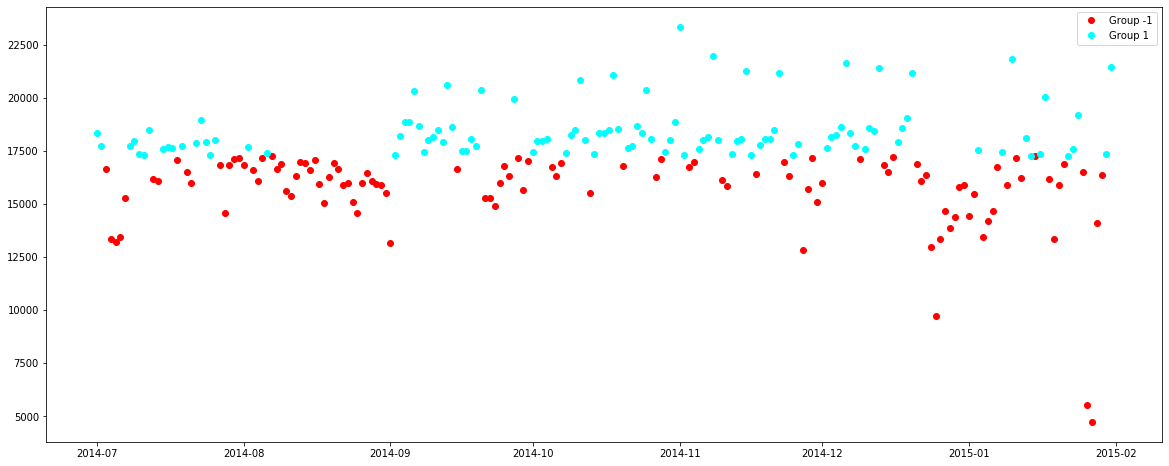

In [188]:
clf = svm.OneClassSVM(kernel='poly')
clf.fit(resampled_df.drop(columns=['timestamp','iqr', 'anomaly','svm']))
out_pred = clf.predict(resampled_df.drop(columns=['timestamp','iqr', 'anomaly','svm']))
resampled_df['svm'] = out_pred
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax.plot_date(resampled_df[resampled_df.svm == -1].timestamp, resampled_df[resampled_df.svm==-1].value,color='red',label='Group -1')
ax.plot_date(resampled_df[resampled_df.svm == 1].timestamp, resampled_df[resampled_df.svm==1].value,color='cyan',label='Group 1')
ax.legend()

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


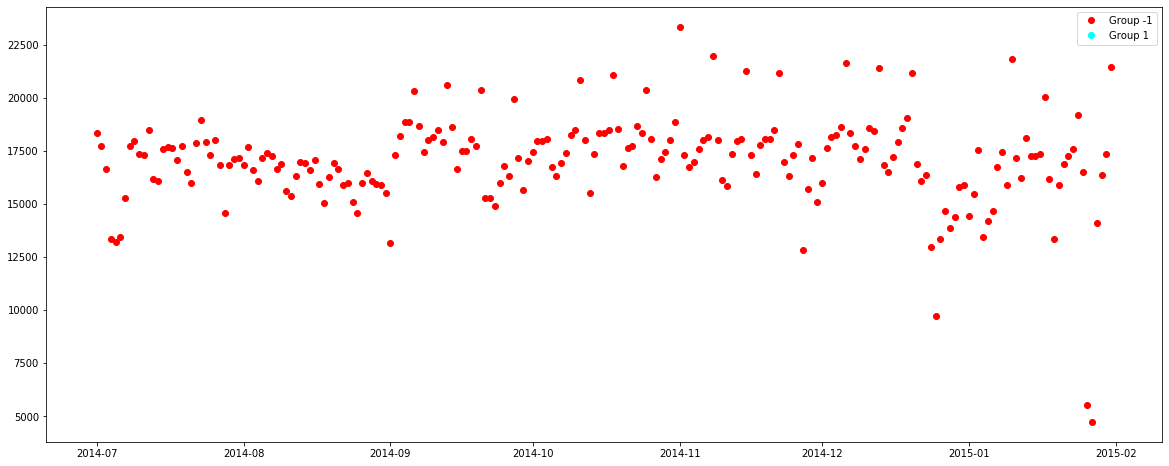

In [189]:
clf = svm.OneClassSVM(kernel='sigmoid')
clf.fit(resampled_df.drop(columns=['timestamp','iqr', 'anomaly','svm']))
out_pred = clf.predict(resampled_df.drop(columns=['timestamp','iqr', 'anomaly','svm']))
resampled_df['svm'] = out_pred
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax.plot_date(resampled_df[resampled_df.svm == -1].timestamp, resampled_df[resampled_df.svm==-1].value,color='red',label='Group -1')
ax.plot_date(resampled_df[resampled_df.svm == 1].timestamp, resampled_df[resampled_df.svm==1].value,color='cyan',label='Group 1')
ax.legend()

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


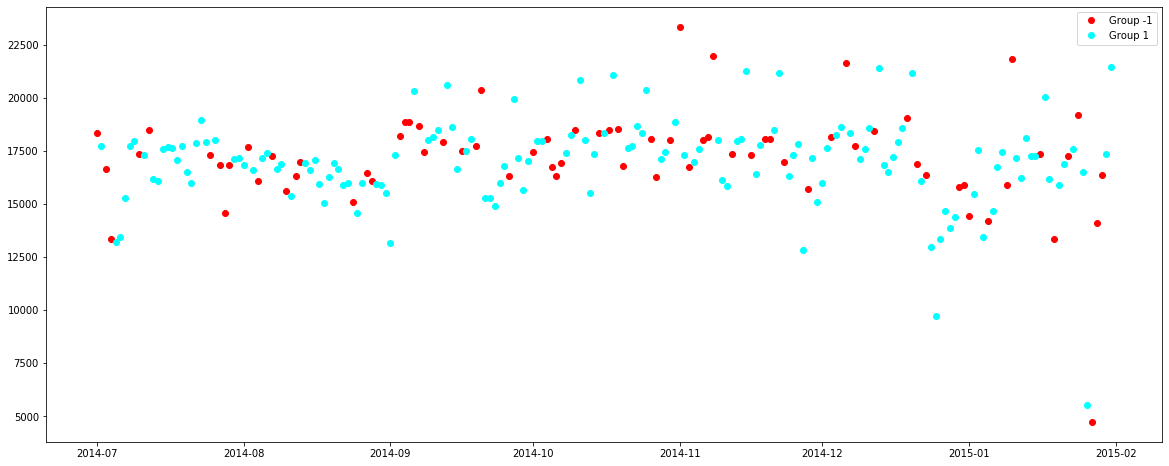

In [199]:
clf = svm.OneClassSVM(kernel='rbf', nu=0.8)
clf.fit(resampled_df.drop(columns=['timestamp','iqr', 'anomaly','svm']))
out_pred = clf.predict(resampled_df.drop(columns=['timestamp','iqr', 'anomaly','svm']))
resampled_df['svm'] = out_pred
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax.plot_date(resampled_df[resampled_df.svm == -1].timestamp, resampled_df[resampled_df.svm==-1].value,color='red',label='Group -1')
ax.plot_date(resampled_df[resampled_df.svm == 1].timestamp, resampled_df[resampled_df.svm==1].value,color='cyan',label='Group 1')
ax.legend()

#### As we can see, SVM gave us a worse result than IQR, most probably this is caused because of our idea to group all the values by the median of each date. Also, some extra feature engineering would definitely help to improve this situation.

### What I did in this Project

#### I only had to deal with two column in this case and both represented numerical values despite the timestamp one being in string format. Therefore the first thing I did was convert this column to a datetime format. The data was divided in intervals of 30 minutes each day so I grouped them into the total sum per day. I did a comparison between the sum and the median and saw that they follow a similar distribution. I already knew that for this dataset the anomalies involved 5 speciific dates; therefore, I decided to group up the data by its median. From there, I created two new columns that represented the day of the week and wether that day or not fell on a weekend. Since the data shows the times for taxi rides in new york, these follow a trend for each day. Mondays usually tend to have the lowest values while saturdays have the highest ones. Also, the weekend column shows wether or not that day falls on the weekend as rides during the weekends tend to be longer. For this project, I used plenty of visualizations as they allowed me to see the data trend and try to find the anomalies visualy. All of the anomalies fell on dates during which the rides were shorter in comparison to the same weekday or the trend of the week. However, during the NYC marathon the median did not show any signs of anomalies. After visualizing the original data without the grouping the data shows a similar trend; however, tha date contains two of the largest ride times during the whole year. 

#### Then I followed by using the Interquartile Range to attempt to identify the anomalies. IQR did a pretty good job of identifying the outliers. However, it classified a lot more dates as outliers . Later, I used a One Class Support Vector Machine to classify the outliers. SVM performed worse than IQR even if I was using different kernels.